# Detrended Fluctuation Analysis

I am going to perform a detrended fluctuation analysis on a random walk generated signal. I should expect a DFA exponent of around 1.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

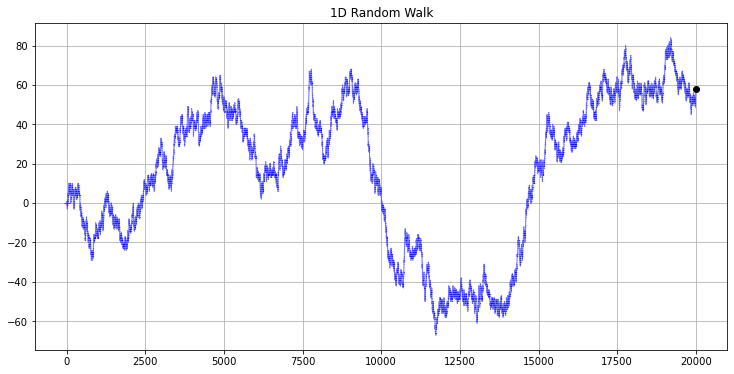

In [8]:
# Define parameters for the walk
dims = 1
step_n = 20000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the path
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(np.arange(step_n+1), path, c="blue",alpha=0.25,s=0.05);
ax.plot(path,c="blue",alpha=0.5,lw=1,ls='-',);
ax.plot(0, start, c="red", marker="+")
ax.plot(step_n, stop, c="black", marker="o")
plt.grid()
plt.title("1D Random Walk")
plt.tight_layout(pad=0)


#path is my vector containing random walk data

In [9]:
path = (path - np.mean(path)).cumsum()

In [10]:
path = path.reshape(len(path))

In [11]:
iterations = int(np.log2(len(path)))

epoch = []
for i in range(iterations):
    
    n = int(len(path)/(2**i)) #Number of samples in each window
    number_of_windows = int(len(path)/n)
    
    windows = np.zeros((number_of_windows, n)) #Vector containing the signal subdivided into windows
    
    for j in range(number_of_windows):
        windows[j] = path[n*j:n*(j+1)]
        
    
    epoch.append(windows)
  

In [12]:
fluctuation = np.empty(len(epoch))

for i in range(len(epoch)):
    error = np.empty(len(epoch[i]))
    for j in range(len(epoch[i])):

        y = epoch[i][j]
        x = np.arange(len(epoch[i][j])).reshape(-1, 1)
        reg = LinearRegression().fit(x, y)
        y_pred = reg.predict(x)

        error[j] = np.sqrt((y-y_pred)**2).cumsum()[-1]
        
    fluctuation[i] = error.cumsum()[-1]

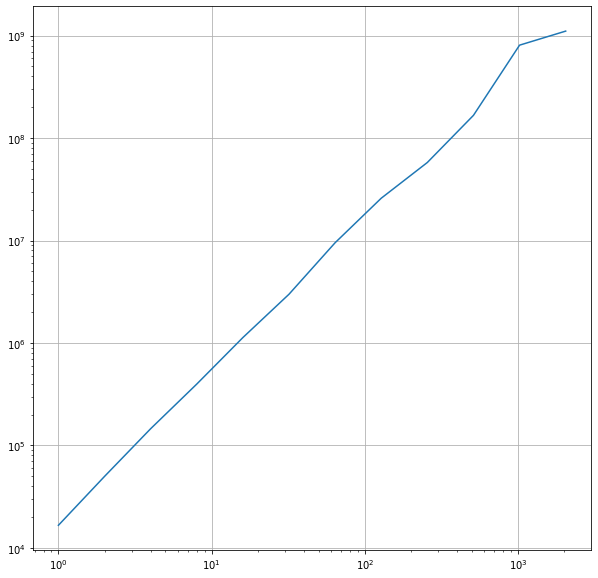

In [13]:
#I remove the last fluctuations values as I was doing a linear interpolation on very few point there... so not indicative

x = [2**i for i in range(iterations-2)][::-1]

plt.figure(figsize=(10,10))
plt.loglog((x),fluctuation[:-2])
plt.grid()
plt.show()

In [14]:
reg = LinearRegression().fit(np.log(x).reshape(-1,1), np.log(fluctuation[:-2]))
DFA_exponent = reg.coef_[0]
DFA_exponent

1.4840054289889837

> Random Walk is the integral of white noise => If I avoid the cumulative sum I should obtain 0.5 (DFA exponent of white noise)